In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import AutoImageProcessor, AutoModel
from torchvision import transforms
import numpy as np
import csv
from PIL import Image
import os
from tqdm import tqdm
import time

In [3]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [2]:


# Load the DINO model and processor
processor = AutoImageProcessor.from_pretrained("facebook/dinov2-large")
dinov2_model = AutoModel.from_pretrained("facebook/dinov2-large").to(device)

print("DINOv2 model loaded successfully!")

Using device: cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/549 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

DINOv2 model loaded successfully!


In [3]:
# Set the model to evaluation mode
dinov2_model.eval()

# Path to your image folder
path_to_data_folder = "/content/drive/MyDrive/w281_Final_Project_Leaf_Disease_Classification_Computer_Vision/Data/train_images"
#path_to_data_folder = "/Users/tamarbrand-perez/Library/CloudStorage/GoogleDrive-terez@berkeley.edu/My Drive/w281_Final_Project_Leaf_Disease_Classification_Computer_Vision/Data/train_images"

# Batch size
BATCH_SIZE = 32

# Function to process a batch of images and get their features
def get_batch_features(image_paths):
    # Measure image loading time
    load_start = time.time()
    images = [Image.open(path).convert('RGB') for path in image_paths]
    load_end = time.time()
    load_time = load_end - load_start
    print(f"Loaded {len(image_paths)} images in {load_time:.2f} seconds")

    # Measure preprocessing and inference time
    infer_start = time.time()
    inputs = processor(images=images, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = dinov2_model(**inputs)
    infer_end = time.time()
    infer_time = infer_end - infer_start
    print(f"Preprocessed and inferred {len(image_paths)} images in {infer_time:.2f} seconds")
    print(outputs[0][:, 0, :].shape)
    return outputs[0][:, 0, :]

# Get list of image files
image_files = [f for f in os.listdir(path_to_data_folder)
               if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Process images in batches
all_features = []
image_names = []

total_start = time.time()

for i in tqdm(range(0, len(image_files), BATCH_SIZE)):
    batch_files = image_files[i:i+BATCH_SIZE]
    batch_paths = [os.path.join(path_to_data_folder, f) for f in batch_files]

    batch_features = get_batch_features(batch_paths)

    all_features.extend(batch_features.cpu().numpy())
    image_names.extend(batch_files)

total_end = time.time()
total_time = total_end - total_start

# Convert to numpy array
all_features = np.array(all_features)

# Save features to CSV
output_csv_path = "dino_features_test.csv"
with open(output_csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write header
    writer.writerow(['image_name'] + [f'feature_{i}' for i in range(all_features.shape[1])])
    # Write data
    for name, features in zip(image_names, all_features):
        writer.writerow([name] + features.tolist())

print(f"Features saved to {output_csv_path}")
print(f"Processed {len(image_names)} images")
print(f"Total processing time: {total_time:.2f} seconds")

  0%|          | 0/562 [00:00<?, ?it/s]

Loaded 32 images in 15.43 seconds
Preprocessed and inferred 32 images in 1.15 seconds
torch.Size([32, 1024])


  0%|          | 1/562 [00:17<2:47:03, 17.87s/it]

Loaded 32 images in 14.63 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


  0%|          | 2/562 [00:34<2:38:08, 16.94s/it]

Loaded 32 images in 13.73 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


  1%|          | 3/562 [00:49<2:31:48, 16.29s/it]

Loaded 32 images in 14.10 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  1%|          | 4/562 [01:05<2:29:32, 16.08s/it]

Loaded 32 images in 13.75 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


  1%|          | 5/562 [01:20<2:26:55, 15.83s/it]

Loaded 32 images in 326.67 seconds
Preprocessed and inferred 32 images in 0.33 seconds
torch.Size([32, 1024])


  1%|          | 6/562 [06:49<18:51:17, 122.08s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  1%|          | 7/562 [06:50<12:45:28, 82.75s/it] 

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


  1%|▏         | 8/562 [06:52<8:46:51, 57.06s/it] 

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


  2%|▏         | 9/562 [06:54<6:07:16, 39.85s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


  2%|▏         | 10/562 [06:57<4:19:10, 28.17s/it]

Loaded 32 images in 0.31 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


  2%|▏         | 11/562 [06:59<3:05:18, 20.18s/it]

Loaded 32 images in 0.70 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  2%|▏         | 12/562 [07:01<2:15:05, 14.74s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  2%|▏         | 13/562 [07:03<1:39:03, 10.83s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  2%|▏         | 14/562 [07:04<1:14:00,  8.10s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


  3%|▎         | 15/562 [07:06<56:40,  6.22s/it]  

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


  3%|▎         | 16/562 [07:08<44:31,  4.89s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  3%|▎         | 17/562 [07:10<36:01,  3.97s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


  3%|▎         | 18/562 [07:12<30:52,  3.40s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


  3%|▎         | 19/562 [07:14<27:04,  2.99s/it]

Loaded 32 images in 0.30 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


  4%|▎         | 20/562 [07:16<24:33,  2.72s/it]

Loaded 32 images in 0.30 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


  4%|▎         | 21/562 [07:18<22:47,  2.53s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  4%|▍         | 22/562 [07:20<20:55,  2.32s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


  4%|▍         | 23/562 [07:22<19:31,  2.17s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  4%|▍         | 24/562 [07:24<18:31,  2.07s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


  4%|▍         | 25/562 [07:26<17:53,  2.00s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  5%|▍         | 26/562 [07:27<17:24,  1.95s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.50 seconds
torch.Size([32, 1024])


  5%|▍         | 27/562 [07:30<17:47,  2.00s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


  5%|▍         | 28/562 [07:32<17:52,  2.01s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


  5%|▌         | 29/562 [07:34<18:01,  2.03s/it]

Loaded 32 images in 0.62 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


  5%|▌         | 30/562 [07:36<18:31,  2.09s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


  6%|▌         | 31/562 [07:38<17:52,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


  6%|▌         | 32/562 [07:40<17:24,  1.97s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  6%|▌         | 33/562 [07:41<16:59,  1.93s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  6%|▌         | 34/562 [07:43<16:46,  1.91s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


  6%|▌         | 35/562 [07:45<17:04,  1.94s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


  6%|▋         | 36/562 [07:47<17:23,  1.98s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.41 seconds
torch.Size([32, 1024])


  7%|▋         | 37/562 [07:49<17:25,  1.99s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  7%|▋         | 38/562 [07:51<17:00,  1.95s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


  7%|▋         | 39/562 [07:53<16:46,  1.92s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


  7%|▋         | 40/562 [07:55<16:32,  1.90s/it]

Loaded 32 images in 0.69 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


  7%|▋         | 41/562 [07:57<17:37,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


  7%|▋         | 42/562 [07:59<17:07,  1.98s/it]

Loaded 32 images in 0.56 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


  8%|▊         | 43/562 [08:02<18:06,  2.09s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


  8%|▊         | 44/562 [08:04<18:01,  2.09s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


  8%|▊         | 45/562 [08:05<17:24,  2.02s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  8%|▊         | 46/562 [08:07<17:00,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  8%|▊         | 47/562 [08:09<16:38,  1.94s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  9%|▊         | 48/562 [08:11<16:26,  1.92s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  9%|▊         | 49/562 [08:13<16:15,  1.90s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


  9%|▉         | 50/562 [08:15<16:43,  1.96s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


  9%|▉         | 51/562 [08:17<17:05,  2.01s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


  9%|▉         | 52/562 [08:19<16:46,  1.97s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


  9%|▉         | 53/562 [08:21<16:30,  1.95s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 10%|▉         | 54/562 [08:23<16:15,  1.92s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 10%|▉         | 55/562 [08:25<16:09,  1.91s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.32 seconds
torch.Size([32, 1024])


 10%|▉         | 56/562 [08:27<16:03,  1.90s/it]

Loaded 32 images in 0.34 seconds
Preprocessed and inferred 32 images in 0.51 seconds
torch.Size([32, 1024])


 10%|█         | 57/562 [08:29<16:48,  2.00s/it]

Loaded 32 images in 0.33 seconds
Preprocessed and inferred 32 images in 0.52 seconds
torch.Size([32, 1024])


 10%|█         | 58/562 [08:31<17:17,  2.06s/it]

Loaded 32 images in 0.34 seconds
Preprocessed and inferred 32 images in 0.57 seconds
torch.Size([32, 1024])


 10%|█         | 59/562 [08:33<17:45,  2.12s/it]

Loaded 32 images in 0.30 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 11%|█         | 60/562 [08:35<17:19,  2.07s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 11%|█         | 61/562 [08:37<16:44,  2.00s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 11%|█         | 62/562 [08:39<16:24,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 11%|█         | 63/562 [08:41<16:05,  1.94s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 11%|█▏        | 64/562 [08:43<15:52,  1.91s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 12%|█▏        | 65/562 [08:45<15:48,  1.91s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


 12%|█▏        | 66/562 [08:47<16:15,  1.97s/it]

Loaded 32 images in 0.34 seconds
Preprocessed and inferred 32 images in 0.51 seconds
torch.Size([32, 1024])


 12%|█▏        | 67/562 [08:49<16:47,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 12%|█▏        | 68/562 [08:51<16:19,  1.98s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 12%|█▏        | 69/562 [08:53<16:03,  1.96s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 12%|█▏        | 70/562 [08:54<15:49,  1.93s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 13%|█▎        | 71/562 [08:56<15:40,  1.91s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 13%|█▎        | 72/562 [08:58<15:34,  1.91s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


 13%|█▎        | 73/562 [09:00<16:01,  1.97s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


 13%|█▎        | 74/562 [09:02<16:20,  2.01s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 13%|█▎        | 75/562 [09:04<15:58,  1.97s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 14%|█▎        | 76/562 [09:06<15:46,  1.95s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 14%|█▎        | 77/562 [09:08<15:35,  1.93s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 14%|█▍        | 78/562 [09:10<15:29,  1.92s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 14%|█▍        | 79/562 [09:12<15:26,  1.92s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


 14%|█▍        | 80/562 [09:14<15:53,  1.98s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 14%|█▍        | 81/562 [09:16<16:11,  2.02s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 15%|█▍        | 82/562 [09:18<15:50,  1.98s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 15%|█▍        | 83/562 [09:20<15:36,  1.96s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 15%|█▍        | 84/562 [09:22<15:27,  1.94s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 15%|█▌        | 85/562 [09:24<15:18,  1.92s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 15%|█▌        | 86/562 [09:26<15:14,  1.92s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 15%|█▌        | 87/562 [09:28<15:07,  1.91s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 16%|█▌        | 88/562 [09:30<15:39,  1.98s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 16%|█▌        | 89/562 [09:32<15:55,  2.02s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 16%|█▌        | 90/562 [09:34<15:40,  1.99s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 16%|█▌        | 91/562 [09:36<15:23,  1.96s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 16%|█▋        | 92/562 [09:37<15:09,  1.94s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 17%|█▋        | 93/562 [09:39<15:03,  1.93s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 17%|█▋        | 94/562 [09:41<14:56,  1.92s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 17%|█▋        | 95/562 [09:43<15:25,  1.98s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 17%|█▋        | 96/562 [09:46<15:43,  2.02s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 17%|█▋        | 97/562 [09:47<15:23,  1.99s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 17%|█▋        | 98/562 [09:49<15:16,  1.98s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 18%|█▊        | 99/562 [09:51<15:04,  1.95s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 18%|█▊        | 100/562 [09:53<14:57,  1.94s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 18%|█▊        | 101/562 [09:55<14:49,  1.93s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 18%|█▊        | 102/562 [09:57<15:17,  1.99s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 18%|█▊        | 103/562 [09:59<15:31,  2.03s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 19%|█▊        | 104/562 [10:01<15:13,  2.00s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 19%|█▊        | 105/562 [10:03<14:59,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 19%|█▉        | 106/562 [10:05<14:49,  1.95s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 19%|█▉        | 107/562 [10:07<14:45,  1.95s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 19%|█▉        | 108/562 [10:09<14:38,  1.94s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 19%|█▉        | 109/562 [10:11<15:09,  2.01s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 20%|█▉        | 110/562 [10:13<15:23,  2.04s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 20%|█▉        | 111/562 [10:15<15:12,  2.02s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 20%|█▉        | 112/562 [10:17<14:56,  1.99s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 20%|██        | 113/562 [10:19<14:42,  1.97s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 20%|██        | 114/562 [10:21<14:34,  1.95s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 20%|██        | 115/562 [10:23<14:27,  1.94s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 21%|██        | 116/562 [10:25<14:57,  2.01s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.51 seconds
torch.Size([32, 1024])


 21%|██        | 117/562 [10:27<15:20,  2.07s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 21%|██        | 118/562 [10:29<15:01,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 21%|██        | 119/562 [10:31<14:45,  2.00s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 21%|██▏       | 120/562 [10:33<14:37,  1.99s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 22%|██▏       | 121/562 [10:35<14:29,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


 22%|██▏       | 122/562 [10:37<14:24,  1.97s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 22%|██▏       | 123/562 [10:39<14:48,  2.02s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


 22%|██▏       | 124/562 [10:41<15:06,  2.07s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 22%|██▏       | 125/562 [10:43<14:52,  2.04s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 22%|██▏       | 126/562 [10:45<14:38,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 23%|██▎       | 127/562 [10:47<14:29,  2.00s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 23%|██▎       | 128/562 [10:49<14:20,  1.98s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 23%|██▎       | 129/562 [10:51<14:11,  1.97s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.42 seconds
torch.Size([32, 1024])


 23%|██▎       | 130/562 [10:53<14:23,  2.00s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 23%|██▎       | 131/562 [10:55<14:42,  2.05s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.35 seconds
torch.Size([32, 1024])


 23%|██▎       | 132/562 [10:57<14:43,  2.05s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 24%|██▎       | 133/562 [10:59<14:24,  2.02s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 24%|██▍       | 134/562 [11:01<14:12,  1.99s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 24%|██▍       | 135/562 [11:03<14:04,  1.98s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 24%|██▍       | 136/562 [11:05<13:57,  1.97s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


 24%|██▍       | 137/562 [11:07<13:55,  1.97s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 25%|██▍       | 138/562 [11:09<14:16,  2.02s/it]

Loaded 32 images in 0.30 seconds
Preprocessed and inferred 32 images in 0.44 seconds
torch.Size([32, 1024])


 25%|██▍       | 139/562 [11:11<14:34,  2.07s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 25%|██▍       | 140/562 [11:13<14:14,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 25%|██▌       | 141/562 [11:15<14:03,  2.00s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


 25%|██▌       | 142/562 [11:17<13:53,  1.98s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 25%|██▌       | 143/562 [11:19<13:46,  1.97s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 26%|██▌       | 144/562 [11:21<13:37,  1.95s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 26%|██▌       | 145/562 [11:23<13:58,  2.01s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 26%|██▌       | 146/562 [11:25<14:14,  2.05s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


 26%|██▌       | 147/562 [11:27<13:57,  2.02s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 26%|██▋       | 148/562 [11:29<13:46,  2.00s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 27%|██▋       | 149/562 [11:31<13:34,  1.97s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 27%|██▋       | 150/562 [11:33<13:30,  1.97s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 27%|██▋       | 151/562 [11:35<13:23,  1.96s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 27%|██▋       | 152/562 [11:37<13:42,  2.01s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 27%|██▋       | 153/562 [11:39<13:58,  2.05s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 27%|██▋       | 154/562 [11:41<13:42,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 28%|██▊       | 155/562 [11:43<13:32,  2.00s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 28%|██▊       | 156/562 [11:45<13:22,  1.98s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 28%|██▊       | 157/562 [11:47<13:16,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 28%|██▊       | 158/562 [11:49<13:09,  1.95s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 28%|██▊       | 159/562 [11:51<13:33,  2.02s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 28%|██▊       | 160/562 [11:53<13:47,  2.06s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 29%|██▊       | 161/562 [11:55<13:31,  2.02s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 29%|██▉       | 162/562 [11:57<13:16,  1.99s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 29%|██▉       | 163/562 [11:59<13:07,  1.97s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 29%|██▉       | 164/562 [12:01<13:02,  1.97s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 29%|██▉       | 165/562 [12:03<12:55,  1.95s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 30%|██▉       | 166/562 [12:05<13:18,  2.02s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 30%|██▉       | 167/562 [12:07<13:32,  2.06s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 30%|██▉       | 168/562 [12:09<13:17,  2.02s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 30%|███       | 169/562 [12:11<13:04,  2.00s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 30%|███       | 170/562 [12:13<12:58,  1.99s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 30%|███       | 171/562 [12:15<12:48,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 31%|███       | 172/562 [12:17<12:42,  1.96s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 31%|███       | 173/562 [12:19<13:07,  2.02s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 31%|███       | 174/562 [12:21<13:19,  2.06s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 31%|███       | 175/562 [12:23<13:04,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 31%|███▏      | 176/562 [12:25<12:50,  2.00s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 31%|███▏      | 177/562 [12:27<12:42,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 32%|███▏      | 178/562 [12:29<12:33,  1.96s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 32%|███▏      | 179/562 [12:31<12:29,  1.96s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 32%|███▏      | 180/562 [12:33<12:51,  2.02s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


 32%|███▏      | 181/562 [12:35<13:03,  2.06s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 32%|███▏      | 182/562 [12:37<12:52,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 33%|███▎      | 183/562 [12:39<12:39,  2.00s/it]

Loaded 32 images in 0.57 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 33%|███▎      | 184/562 [12:41<13:08,  2.09s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 33%|███▎      | 185/562 [12:43<12:48,  2.04s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 33%|███▎      | 186/562 [12:45<12:36,  2.01s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.52 seconds
torch.Size([32, 1024])


 33%|███▎      | 187/562 [12:48<12:57,  2.07s/it]

Loaded 32 images in 0.33 seconds
Preprocessed and inferred 32 images in 0.55 seconds
torch.Size([32, 1024])


 33%|███▎      | 188/562 [12:50<13:21,  2.14s/it]

Loaded 32 images in 0.35 seconds
Preprocessed and inferred 32 images in 0.53 seconds
torch.Size([32, 1024])


 34%|███▎      | 189/562 [12:52<13:36,  2.19s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.39 seconds
torch.Size([32, 1024])


 34%|███▍      | 190/562 [12:54<13:24,  2.16s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.33 seconds
torch.Size([32, 1024])


 34%|███▍      | 191/562 [12:56<13:06,  2.12s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 34%|███▍      | 192/562 [12:58<12:42,  2.06s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 34%|███▍      | 193/562 [13:00<12:28,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 35%|███▍      | 194/562 [13:02<12:15,  2.00s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 35%|███▍      | 195/562 [13:04<12:08,  1.98s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


 35%|███▍      | 196/562 [13:06<12:23,  2.03s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


 35%|███▌      | 197/562 [13:08<12:35,  2.07s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 35%|███▌      | 198/562 [13:10<12:16,  2.02s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 35%|███▌      | 199/562 [13:12<12:05,  2.00s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 36%|███▌      | 200/562 [13:14<11:56,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 36%|███▌      | 201/562 [13:16<11:49,  1.97s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 36%|███▌      | 202/562 [13:18<11:45,  1.96s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.50 seconds
torch.Size([32, 1024])


 36%|███▌      | 203/562 [13:20<12:06,  2.02s/it]

Loaded 32 images in 0.33 seconds
Preprocessed and inferred 32 images in 0.44 seconds
torch.Size([32, 1024])


 36%|███▋      | 204/562 [13:22<12:23,  2.08s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 36%|███▋      | 205/562 [13:24<12:04,  2.03s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.33 seconds
torch.Size([32, 1024])


 37%|███▋      | 206/562 [13:26<11:58,  2.02s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 37%|███▋      | 207/562 [13:28<11:46,  1.99s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 37%|███▋      | 208/562 [13:30<11:38,  1.97s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 37%|███▋      | 209/562 [13:32<11:34,  1.97s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


 37%|███▋      | 210/562 [13:34<11:53,  2.03s/it]

Loaded 32 images in 0.30 seconds
Preprocessed and inferred 32 images in 0.51 seconds
torch.Size([32, 1024])


 38%|███▊      | 211/562 [13:37<12:11,  2.09s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 38%|███▊      | 212/562 [13:38<11:53,  2.04s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 38%|███▊      | 213/562 [13:40<11:41,  2.01s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 38%|███▊      | 214/562 [13:42<11:31,  1.99s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 38%|███▊      | 215/562 [13:44<11:22,  1.97s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 38%|███▊      | 216/562 [13:46<11:17,  1.96s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 39%|███▊      | 217/562 [13:48<11:34,  2.01s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 39%|███▉      | 218/562 [13:50<11:47,  2.06s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 39%|███▉      | 219/562 [13:52<11:30,  2.01s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 39%|███▉      | 220/562 [13:54<11:22,  1.99s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 39%|███▉      | 221/562 [13:56<11:13,  1.97s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 40%|███▉      | 222/562 [13:58<11:09,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 40%|███▉      | 223/562 [14:00<11:03,  1.96s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 40%|███▉      | 224/562 [14:02<11:23,  2.02s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 40%|████      | 225/562 [14:04<11:34,  2.06s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 40%|████      | 226/562 [14:06<11:18,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 40%|████      | 227/562 [14:08<11:08,  2.00s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 41%|████      | 228/562 [14:10<11:00,  1.98s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 41%|████      | 229/562 [14:12<10:55,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 41%|████      | 230/562 [14:14<10:49,  1.96s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 41%|████      | 231/562 [14:16<11:07,  2.02s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


 41%|████▏     | 232/562 [14:18<11:17,  2.05s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 41%|████▏     | 233/562 [14:20<11:04,  2.02s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 42%|████▏     | 234/562 [14:22<10:53,  1.99s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 42%|████▏     | 235/562 [14:24<10:47,  1.98s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 42%|████▏     | 236/562 [14:26<10:40,  1.96s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 42%|████▏     | 237/562 [14:28<10:34,  1.95s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 42%|████▏     | 238/562 [14:30<10:50,  2.01s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 43%|████▎     | 239/562 [14:32<11:03,  2.05s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 43%|████▎     | 240/562 [14:34<10:54,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 43%|████▎     | 241/562 [14:36<10:41,  2.00s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 43%|████▎     | 242/562 [14:38<10:35,  1.99s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 43%|████▎     | 243/562 [14:40<10:27,  1.97s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


 43%|████▎     | 244/562 [14:42<10:24,  1.96s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.32 seconds
torch.Size([32, 1024])


 44%|████▎     | 245/562 [14:44<10:20,  1.96s/it]

Loaded 32 images in 0.31 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 44%|████▍     | 246/562 [14:46<10:40,  2.03s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.43 seconds
torch.Size([32, 1024])


 44%|████▍     | 247/562 [14:48<10:47,  2.05s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 44%|████▍     | 248/562 [14:50<10:33,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 44%|████▍     | 249/562 [14:52<10:23,  1.99s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 44%|████▍     | 250/562 [14:54<10:16,  1.98s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 45%|████▍     | 251/562 [14:56<10:12,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 45%|████▍     | 252/562 [14:58<10:07,  1.96s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 45%|████▌     | 253/562 [15:00<10:25,  2.03s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


 45%|████▌     | 254/562 [15:02<10:34,  2.06s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 45%|████▌     | 255/562 [15:04<10:22,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 46%|████▌     | 256/562 [15:06<10:11,  2.00s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 46%|████▌     | 257/562 [15:08<10:04,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


 46%|████▌     | 258/562 [15:10<09:58,  1.97s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 46%|████▌     | 259/562 [15:12<09:55,  1.96s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 46%|████▋     | 260/562 [15:14<10:09,  2.02s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


 46%|████▋     | 261/562 [15:16<10:16,  2.05s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 47%|████▋     | 262/562 [15:18<10:04,  2.01s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 47%|████▋     | 263/562 [15:20<09:53,  1.99s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 47%|████▋     | 264/562 [15:22<09:48,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 47%|████▋     | 265/562 [15:24<09:42,  1.96s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 47%|████▋     | 266/562 [15:26<09:39,  1.96s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 48%|████▊     | 267/562 [15:28<09:56,  2.02s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 48%|████▊     | 268/562 [15:30<10:07,  2.07s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 48%|████▊     | 269/562 [15:32<09:52,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 48%|████▊     | 270/562 [15:34<09:44,  2.00s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 48%|████▊     | 271/562 [15:36<09:35,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 48%|████▊     | 272/562 [15:38<09:28,  1.96s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 49%|████▊     | 273/562 [15:40<09:24,  1.95s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 49%|████▉     | 274/562 [15:42<09:39,  2.01s/it]

Loaded 32 images in 0.30 seconds
Preprocessed and inferred 32 images in 0.44 seconds
torch.Size([32, 1024])


 49%|████▉     | 275/562 [15:44<09:50,  2.06s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 49%|████▉     | 276/562 [15:46<09:36,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 49%|████▉     | 277/562 [15:48<09:28,  1.99s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 49%|████▉     | 278/562 [15:50<09:21,  1.98s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 50%|████▉     | 279/562 [15:52<09:16,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 50%|████▉     | 280/562 [15:54<09:11,  1.96s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 50%|█████     | 281/562 [15:56<09:28,  2.02s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 50%|█████     | 282/562 [15:58<09:36,  2.06s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 50%|█████     | 283/562 [16:00<09:25,  2.03s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


 51%|█████     | 284/562 [16:02<09:17,  2.00s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 51%|█████     | 285/562 [16:04<09:08,  1.98s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 51%|█████     | 286/562 [16:06<09:03,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 51%|█████     | 287/562 [16:08<08:57,  1.95s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 51%|█████     | 288/562 [16:10<09:13,  2.02s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 51%|█████▏    | 289/562 [16:12<09:23,  2.06s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 52%|█████▏    | 290/562 [16:14<09:11,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 52%|█████▏    | 291/562 [16:16<09:00,  1.99s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 52%|█████▏    | 292/562 [16:18<08:55,  1.98s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 52%|█████▏    | 293/562 [16:20<08:48,  1.97s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 52%|█████▏    | 294/562 [16:22<08:46,  1.96s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 52%|█████▏    | 295/562 [16:24<09:00,  2.02s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 53%|█████▎    | 296/562 [16:26<09:08,  2.06s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 53%|█████▎    | 297/562 [16:28<08:57,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 53%|█████▎    | 298/562 [16:30<08:48,  2.00s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 53%|█████▎    | 299/562 [16:32<08:42,  1.99s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 53%|█████▎    | 300/562 [16:34<08:36,  1.97s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 54%|█████▎    | 301/562 [16:36<08:32,  1.96s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


 54%|█████▎    | 302/562 [16:38<08:46,  2.02s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


 54%|█████▍    | 303/562 [16:41<08:55,  2.07s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 54%|█████▍    | 304/562 [16:42<08:41,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 54%|█████▍    | 305/562 [16:44<08:33,  2.00s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 54%|█████▍    | 306/562 [16:46<08:25,  1.97s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 55%|█████▍    | 307/562 [16:48<08:21,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 55%|█████▍    | 308/562 [16:50<08:16,  1.95s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 55%|█████▍    | 309/562 [16:52<08:29,  2.02s/it]

Loaded 32 images in 0.30 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


 55%|█████▌    | 310/562 [16:54<08:39,  2.06s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 55%|█████▌    | 311/562 [16:56<08:27,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 56%|█████▌    | 312/562 [16:58<08:19,  2.00s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 56%|█████▌    | 313/562 [17:00<08:13,  1.98s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 56%|█████▌    | 314/562 [17:02<08:08,  1.97s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 56%|█████▌    | 315/562 [17:04<08:03,  1.96s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 56%|█████▌    | 316/562 [17:06<08:18,  2.03s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.56 seconds
torch.Size([32, 1024])


 56%|█████▋    | 317/562 [17:09<08:31,  2.09s/it]

Loaded 32 images in 0.32 seconds
Preprocessed and inferred 32 images in 0.53 seconds
torch.Size([32, 1024])


 57%|█████▋    | 318/562 [17:11<08:42,  2.14s/it]

Loaded 32 images in 0.34 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 57%|█████▋    | 319/562 [17:13<08:45,  2.16s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


 57%|█████▋    | 320/562 [17:15<08:28,  2.10s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 57%|█████▋    | 321/562 [17:17<08:14,  2.05s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 57%|█████▋    | 322/562 [17:19<08:04,  2.02s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


 57%|█████▋    | 323/562 [17:21<07:57,  2.00s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.41 seconds
torch.Size([32, 1024])


 58%|█████▊    | 324/562 [17:23<07:58,  2.01s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 58%|█████▊    | 325/562 [17:25<08:06,  2.05s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.33 seconds
torch.Size([32, 1024])


 58%|█████▊    | 326/562 [17:27<08:02,  2.04s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 58%|█████▊    | 327/562 [17:29<07:54,  2.02s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 58%|█████▊    | 328/562 [17:31<07:46,  1.99s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 59%|█████▊    | 329/562 [17:33<07:40,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 59%|█████▊    | 330/562 [17:35<07:36,  1.97s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 59%|█████▉    | 331/562 [17:37<07:32,  1.96s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


 59%|█████▉    | 332/562 [17:39<07:44,  2.02s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


 59%|█████▉    | 333/562 [17:41<07:51,  2.06s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 59%|█████▉    | 334/562 [17:43<07:41,  2.02s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 60%|█████▉    | 335/562 [17:45<07:33,  2.00s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 60%|█████▉    | 336/562 [17:47<07:25,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 60%|█████▉    | 337/562 [17:49<07:20,  1.96s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 60%|██████    | 338/562 [17:51<07:17,  1.95s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 60%|██████    | 339/562 [17:53<07:28,  2.01s/it]

Loaded 32 images in 0.30 seconds
Preprocessed and inferred 32 images in 0.44 seconds
torch.Size([32, 1024])


 60%|██████    | 340/562 [17:55<07:36,  2.06s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 61%|██████    | 341/562 [17:57<07:25,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 61%|██████    | 342/562 [17:59<07:18,  1.99s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 61%|██████    | 343/562 [18:01<07:11,  1.97s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 61%|██████    | 344/562 [18:03<07:07,  1.96s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 61%|██████▏   | 345/562 [18:05<07:02,  1.95s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


 62%|██████▏   | 346/562 [18:07<07:16,  2.02s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 62%|██████▏   | 347/562 [18:09<07:23,  2.06s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 62%|██████▏   | 348/562 [18:11<07:13,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 62%|██████▏   | 349/562 [18:13<07:05,  2.00s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 62%|██████▏   | 350/562 [18:15<06:59,  1.98s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 62%|██████▏   | 351/562 [18:17<06:53,  1.96s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 63%|██████▎   | 352/562 [18:19<06:49,  1.95s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 63%|██████▎   | 353/562 [18:21<07:01,  2.02s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 63%|██████▎   | 354/562 [18:23<07:08,  2.06s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 63%|██████▎   | 355/562 [18:25<06:58,  2.02s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 63%|██████▎   | 356/562 [18:27<06:50,  1.99s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 64%|██████▎   | 357/562 [18:29<06:46,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 64%|██████▎   | 358/562 [18:31<06:40,  1.96s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 64%|██████▍   | 359/562 [18:33<06:37,  1.96s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 64%|██████▍   | 360/562 [18:35<06:47,  2.02s/it]

Loaded 32 images in 0.30 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 64%|██████▍   | 361/562 [18:37<06:55,  2.07s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 64%|██████▍   | 362/562 [18:39<06:45,  2.03s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


 65%|██████▍   | 363/562 [18:41<06:39,  2.01s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 65%|██████▍   | 364/562 [18:43<06:33,  1.99s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 65%|██████▍   | 365/562 [18:45<06:29,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 65%|██████▌   | 366/562 [18:47<06:24,  1.96s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 65%|██████▌   | 367/562 [18:49<06:32,  2.02s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 65%|██████▌   | 368/562 [18:51<06:39,  2.06s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 66%|██████▌   | 369/562 [18:53<06:29,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 66%|██████▌   | 370/562 [18:55<06:23,  2.00s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 66%|██████▌   | 371/562 [18:57<06:17,  1.98s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 66%|██████▌   | 372/562 [18:59<06:13,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 66%|██████▋   | 373/562 [19:01<06:09,  1.95s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


 67%|██████▋   | 374/562 [19:03<06:19,  2.02s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 67%|██████▋   | 375/562 [19:05<06:25,  2.06s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 67%|██████▋   | 376/562 [19:07<06:16,  2.02s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 67%|██████▋   | 377/562 [19:09<06:09,  2.00s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


 67%|██████▋   | 378/562 [19:11<06:05,  1.99s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 67%|██████▋   | 379/562 [19:13<06:01,  1.97s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 68%|██████▊   | 380/562 [19:15<05:58,  1.97s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


 68%|██████▊   | 381/562 [19:17<06:07,  2.03s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


 68%|██████▊   | 382/562 [19:19<06:12,  2.07s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 68%|██████▊   | 383/562 [19:21<06:04,  2.04s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 68%|██████▊   | 384/562 [19:23<05:56,  2.00s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 69%|██████▊   | 385/562 [19:25<05:50,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 69%|██████▊   | 386/562 [19:27<05:45,  1.96s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 69%|██████▉   | 387/562 [19:29<05:42,  1.96s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 69%|██████▉   | 388/562 [19:31<05:50,  2.02s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 69%|██████▉   | 389/562 [19:33<05:57,  2.07s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 69%|██████▉   | 390/562 [19:35<05:47,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 70%|██████▉   | 391/562 [19:37<05:41,  2.00s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 70%|██████▉   | 392/562 [19:39<05:36,  1.98s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 70%|██████▉   | 393/562 [19:41<05:33,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 70%|███████   | 394/562 [19:43<05:29,  1.96s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 70%|███████   | 395/562 [19:45<05:38,  2.03s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


 70%|███████   | 396/562 [19:47<05:42,  2.06s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 71%|███████   | 397/562 [19:49<05:33,  2.02s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 71%|███████   | 398/562 [19:51<05:27,  2.00s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 71%|███████   | 399/562 [19:53<05:21,  1.97s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 71%|███████   | 400/562 [19:55<05:17,  1.96s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 71%|███████▏  | 401/562 [19:57<05:14,  1.95s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 72%|███████▏  | 402/562 [19:59<05:22,  2.02s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


 72%|███████▏  | 403/562 [20:01<05:26,  2.05s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 72%|███████▏  | 404/562 [20:03<05:19,  2.02s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 72%|███████▏  | 405/562 [20:05<05:13,  2.00s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 72%|███████▏  | 406/562 [20:07<05:08,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 72%|███████▏  | 407/562 [20:09<05:04,  1.97s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 73%|███████▎  | 408/562 [20:11<05:02,  1.96s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


 73%|███████▎  | 409/562 [20:13<05:08,  2.02s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 73%|███████▎  | 410/562 [20:15<05:13,  2.06s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 73%|███████▎  | 411/562 [20:17<05:05,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 73%|███████▎  | 412/562 [20:19<04:59,  2.00s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 73%|███████▎  | 413/562 [20:21<04:55,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 74%|███████▎  | 414/562 [20:23<04:50,  1.97s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 74%|███████▍  | 415/562 [20:25<04:48,  1.96s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 74%|███████▍  | 416/562 [20:27<04:54,  2.02s/it]

Loaded 32 images in 0.33 seconds
Preprocessed and inferred 32 images in 0.43 seconds
torch.Size([32, 1024])


 74%|███████▍  | 417/562 [20:29<04:59,  2.07s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 74%|███████▍  | 418/562 [20:31<04:51,  2.02s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


 75%|███████▍  | 419/562 [20:33<04:46,  2.01s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 75%|███████▍  | 420/562 [20:35<04:41,  1.98s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 75%|███████▍  | 421/562 [20:37<04:37,  1.97s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 75%|███████▌  | 422/562 [20:39<04:33,  1.96s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 75%|███████▌  | 423/562 [20:41<04:40,  2.02s/it]

Loaded 32 images in 0.30 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 75%|███████▌  | 424/562 [20:43<04:45,  2.07s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 76%|███████▌  | 425/562 [20:45<04:36,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 76%|███████▌  | 426/562 [20:47<04:31,  1.99s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 76%|███████▌  | 427/562 [20:49<04:25,  1.97s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 76%|███████▌  | 428/562 [20:51<04:22,  1.96s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 76%|███████▋  | 429/562 [20:53<04:19,  1.95s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 77%|███████▋  | 430/562 [20:55<04:26,  2.02s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 77%|███████▋  | 431/562 [20:57<04:30,  2.06s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 77%|███████▋  | 432/562 [20:59<04:23,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 77%|███████▋  | 433/562 [21:01<04:17,  1.99s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 77%|███████▋  | 434/562 [21:03<04:13,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 77%|███████▋  | 435/562 [21:05<04:09,  1.96s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 78%|███████▊  | 436/562 [21:07<04:07,  1.96s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 78%|███████▊  | 437/562 [21:09<04:12,  2.02s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 78%|███████▊  | 438/562 [21:11<04:15,  2.06s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 78%|███████▊  | 439/562 [21:13<04:09,  2.02s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 78%|███████▊  | 440/562 [21:15<04:03,  1.99s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 78%|███████▊  | 441/562 [21:17<03:59,  1.98s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 79%|███████▊  | 442/562 [21:19<03:55,  1.96s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.32 seconds
torch.Size([32, 1024])


 79%|███████▉  | 443/562 [21:21<03:54,  1.97s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 79%|███████▉  | 444/562 [21:23<03:59,  2.03s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 79%|███████▉  | 445/562 [21:25<04:02,  2.07s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 79%|███████▉  | 446/562 [21:27<04:02,  2.09s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


 80%|███████▉  | 447/562 [21:30<04:02,  2.11s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 80%|███████▉  | 448/562 [21:31<03:54,  2.05s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 80%|███████▉  | 449/562 [21:33<03:48,  2.02s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 80%|████████  | 450/562 [21:35<03:42,  1.99s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 80%|████████  | 451/562 [21:37<03:46,  2.04s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.41 seconds
torch.Size([32, 1024])


 80%|████████  | 452/562 [21:40<03:47,  2.06s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 81%|████████  | 453/562 [21:42<03:40,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 81%|████████  | 454/562 [21:43<03:36,  2.00s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 81%|████████  | 455/562 [21:45<03:32,  1.98s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 81%|████████  | 456/562 [21:47<03:28,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 81%|████████▏ | 457/562 [21:49<03:25,  1.96s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 81%|████████▏ | 458/562 [21:51<03:29,  2.02s/it]

Loaded 32 images in 0.66 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


 82%|████████▏ | 459/562 [21:54<03:39,  2.13s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 82%|████████▏ | 460/562 [21:56<03:31,  2.07s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 82%|████████▏ | 461/562 [21:58<03:25,  2.03s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 82%|████████▏ | 462/562 [22:00<03:21,  2.01s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 82%|████████▏ | 463/562 [22:02<03:16,  1.99s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.41 seconds
torch.Size([32, 1024])


 83%|████████▎ | 464/562 [22:04<03:17,  2.01s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


 83%|████████▎ | 465/562 [22:06<03:18,  2.04s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.33 seconds
torch.Size([32, 1024])


 83%|████████▎ | 466/562 [22:08<03:16,  2.04s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 83%|████████▎ | 467/562 [22:10<03:10,  2.00s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 83%|████████▎ | 468/562 [22:12<03:06,  1.98s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 83%|████████▎ | 469/562 [22:14<03:03,  1.98s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 84%|████████▎ | 470/562 [22:16<03:00,  1.96s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 84%|████████▍ | 471/562 [22:18<02:58,  1.96s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 84%|████████▍ | 472/562 [22:20<03:01,  2.01s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.42 seconds
torch.Size([32, 1024])


 84%|████████▍ | 473/562 [22:22<03:02,  2.05s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 84%|████████▍ | 474/562 [22:24<02:57,  2.02s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 85%|████████▍ | 475/562 [22:26<02:53,  2.00s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 85%|████████▍ | 476/562 [22:28<02:50,  1.98s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 85%|████████▍ | 477/562 [22:30<02:47,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 85%|████████▌ | 478/562 [22:31<02:44,  1.95s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 85%|████████▌ | 479/562 [22:34<02:47,  2.02s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.44 seconds
torch.Size([32, 1024])


 85%|████████▌ | 480/562 [22:36<02:48,  2.05s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 86%|████████▌ | 481/562 [22:38<02:43,  2.02s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 86%|████████▌ | 482/562 [22:40<02:39,  1.99s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 86%|████████▌ | 483/562 [22:42<02:35,  1.97s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 86%|████████▌ | 484/562 [22:44<02:33,  1.97s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 86%|████████▋ | 485/562 [22:45<02:30,  1.96s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 86%|████████▋ | 486/562 [22:48<02:33,  2.03s/it]

Loaded 32 images in 0.30 seconds
Preprocessed and inferred 32 images in 0.43 seconds
torch.Size([32, 1024])


 87%|████████▋ | 487/562 [22:50<02:34,  2.06s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 87%|████████▋ | 488/562 [22:52<02:30,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 87%|████████▋ | 489/562 [22:54<02:25,  2.00s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 87%|████████▋ | 490/562 [22:56<02:23,  1.99s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 87%|████████▋ | 491/562 [22:58<02:19,  1.97s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 88%|████████▊ | 492/562 [23:00<02:17,  1.96s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 88%|████████▊ | 493/562 [23:02<02:19,  2.02s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 88%|████████▊ | 494/562 [23:04<02:20,  2.07s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 88%|████████▊ | 495/562 [23:06<02:15,  2.03s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 88%|████████▊ | 496/562 [23:08<02:11,  1.99s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 88%|████████▊ | 497/562 [23:10<02:08,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 89%|████████▊ | 498/562 [23:12<02:05,  1.96s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 89%|████████▉ | 499/562 [23:14<02:03,  1.95s/it]

Loaded 32 images in 0.31 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 89%|████████▉ | 500/562 [23:16<02:06,  2.03s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.45 seconds
torch.Size([32, 1024])


 89%|████████▉ | 501/562 [23:18<02:06,  2.07s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 89%|████████▉ | 502/562 [23:20<02:01,  2.03s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 90%|████████▉ | 503/562 [23:22<01:58,  2.00s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 90%|████████▉ | 504/562 [23:24<01:54,  1.98s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 90%|████████▉ | 505/562 [23:26<01:52,  1.97s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 90%|█████████ | 506/562 [23:28<01:49,  1.96s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.49 seconds
torch.Size([32, 1024])


 90%|█████████ | 507/562 [23:30<01:51,  2.03s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 90%|█████████ | 508/562 [23:32<01:51,  2.07s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 91%|█████████ | 509/562 [23:34<01:47,  2.03s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 91%|█████████ | 510/562 [23:36<01:43,  2.00s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 91%|█████████ | 511/562 [23:38<01:40,  1.97s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 91%|█████████ | 512/562 [23:40<01:38,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 91%|█████████▏| 513/562 [23:42<01:35,  1.95s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 91%|█████████▏| 514/562 [23:44<01:37,  2.02s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 92%|█████████▏| 515/562 [23:46<01:36,  2.06s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 92%|█████████▏| 516/562 [23:48<01:33,  2.03s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 92%|█████████▏| 517/562 [23:50<01:29,  2.00s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 92%|█████████▏| 518/562 [23:52<01:27,  1.99s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 92%|█████████▏| 519/562 [23:54<01:24,  1.98s/it]

Loaded 32 images in 0.68 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 93%|█████████▎| 520/562 [23:56<01:28,  2.10s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 93%|█████████▎| 521/562 [23:58<01:26,  2.11s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.44 seconds
torch.Size([32, 1024])


 93%|█████████▎| 522/562 [24:00<01:25,  2.13s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 93%|█████████▎| 523/562 [24:02<01:20,  2.06s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 93%|█████████▎| 524/562 [24:04<01:17,  2.03s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 93%|█████████▎| 525/562 [24:06<01:14,  2.00s/it]

Loaded 32 images in 0.70 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 94%|█████████▎| 526/562 [24:09<01:16,  2.12s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.34 seconds
torch.Size([32, 1024])


 94%|█████████▍| 527/562 [24:11<01:12,  2.08s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 94%|█████████▍| 528/562 [24:13<01:11,  2.11s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.38 seconds
torch.Size([32, 1024])


 94%|█████████▍| 529/562 [24:15<01:09,  2.10s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 94%|█████████▍| 530/562 [24:17<01:05,  2.05s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


 94%|█████████▍| 531/562 [24:19<01:02,  2.02s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 95%|█████████▍| 532/562 [24:21<00:59,  1.99s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 95%|█████████▍| 533/562 [24:23<00:57,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 95%|█████████▌| 534/562 [24:25<00:55,  1.97s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 95%|█████████▌| 535/562 [24:27<00:54,  2.03s/it]

Loaded 32 images in 0.29 seconds
Preprocessed and inferred 32 images in 0.42 seconds
torch.Size([32, 1024])


 95%|█████████▌| 536/562 [24:29<00:53,  2.06s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 96%|█████████▌| 537/562 [24:31<00:50,  2.03s/it]

Loaded 32 images in 0.20 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 96%|█████████▌| 538/562 [24:33<00:47,  2.00s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 96%|█████████▌| 539/562 [24:35<00:45,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 96%|█████████▌| 540/562 [24:37<00:43,  1.96s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 96%|█████████▋| 541/562 [24:39<00:41,  1.96s/it]

Loaded 32 images in 0.28 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 96%|█████████▋| 542/562 [24:41<00:40,  2.02s/it]

Loaded 32 images in 0.27 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 97%|█████████▋| 543/562 [24:43<00:39,  2.06s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 97%|█████████▋| 544/562 [24:45<00:36,  2.02s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 97%|█████████▋| 545/562 [24:47<00:33,  2.00s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 97%|█████████▋| 546/562 [24:49<00:31,  1.98s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.31 seconds
torch.Size([32, 1024])


 97%|█████████▋| 547/562 [24:51<00:29,  1.97s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 98%|█████████▊| 548/562 [24:53<00:27,  1.96s/it]

Loaded 32 images in 0.26 seconds
Preprocessed and inferred 32 images in 0.46 seconds
torch.Size([32, 1024])


 98%|█████████▊| 549/562 [24:55<00:26,  2.02s/it]

Loaded 32 images in 0.30 seconds
Preprocessed and inferred 32 images in 0.48 seconds
torch.Size([32, 1024])


 98%|█████████▊| 550/562 [24:57<00:24,  2.07s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 98%|█████████▊| 551/562 [24:59<00:22,  2.02s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.30 seconds
torch.Size([32, 1024])


 98%|█████████▊| 552/562 [25:01<00:20,  2.01s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 98%|█████████▊| 553/562 [25:03<00:17,  1.98s/it]

Loaded 32 images in 0.23 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 99%|█████████▊| 554/562 [25:05<00:15,  1.97s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 99%|█████████▉| 555/562 [25:07<00:13,  1.96s/it]

Loaded 32 images in 0.25 seconds
Preprocessed and inferred 32 images in 0.47 seconds
torch.Size([32, 1024])


 99%|█████████▉| 556/562 [25:09<00:12,  2.01s/it]

Loaded 32 images in 0.31 seconds
Preprocessed and inferred 32 images in 0.43 seconds
torch.Size([32, 1024])


 99%|█████████▉| 557/562 [25:11<00:10,  2.06s/it]

Loaded 32 images in 0.21 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 99%|█████████▉| 558/562 [25:13<00:08,  2.02s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


 99%|█████████▉| 559/562 [25:15<00:05,  1.99s/it]

Loaded 32 images in 0.22 seconds
Preprocessed and inferred 32 images in 0.28 seconds
torch.Size([32, 1024])


100%|█████████▉| 560/562 [25:17<00:03,  1.98s/it]

Loaded 32 images in 0.24 seconds
Preprocessed and inferred 32 images in 0.29 seconds
torch.Size([32, 1024])


100%|█████████▉| 561/562 [25:19<00:01,  1.97s/it]

Loaded 6 images in 0.05 seconds
Preprocessed and inferred 6 images in 0.07 seconds
torch.Size([6, 1024])


100%|██████████| 562/562 [25:19<00:00,  2.70s/it]


Features saved to dino_features_test.csv
Processed 17958 images
Total processing time: 1519.54 seconds


In [5]:
import os

# Specify the filename you are looking for
file_name = "Dinov2_Colab.ipynb"

# Walk through Google Drive directories to search for the file
for root, dirs, files in os.walk('/content/drive/My Drive'):
    if file_name in files:
        print(f"File found at: {os.path.join(root, file_name)}")
        break
else:
    print("File not found.")

File found at: /content/drive/My Drive/Colab Notebooks/Dinov2_Colab.ipynb


In [5]:

# Specify the filename you are looking for
file_name = "dino_features_test.csv"

# Walk through Google Drive directories to search for the file
for root, dirs, files in os.walk('/content/drive/My Drive'):
    if file_name in files:
        print(f"File found at: {os.path.join(root, file_name)}")
        break
else:
    print("File not found.")


    dino_features_test.csv is located under sample_data folder
    /content/sample_data
    /content/dino_features_test.csv

File not found.


In [6]:
import pandas as pd

# Load the CSV file
file_path = "/content/dino_features_test.csv"
data = pd.read_csv(file_path)

# View the first few rows
print(data.head())

# Check how many rows are in the file
print(f"Total rows: {len(data)}")

      image_name  feature_0  feature_1  feature_2  feature_3  feature_4  \
0  815952257.jpg  -1.218479  -0.890325  -0.978796   1.412890   2.036721   
1  804056394.jpg  -0.321625   0.429433  -0.916489  -1.564428   0.868534   
2  813744167.jpg  -0.165353   0.745406  -1.986877   1.228598   1.937814   
3  809104607.jpg  -0.845216   1.366558  -1.070533  -0.250762   0.369885   
4  812408252.jpg  -0.375725  -1.761756   0.227859   0.764441   1.012874   

   feature_5  feature_6  feature_7  feature_8  ...  feature_1014  \
0  -0.623808  -2.664766   0.017882   0.783833  ...     -0.236986   
1   0.306750  -1.559206  -1.877747   0.921418  ...     -1.742028   
2  -1.488437  -1.247563   0.828581  -0.136418  ...     -1.325526   
3  -0.177517  -2.845576  -1.159715   0.859124  ...     -2.442524   
4  -0.276079  -1.720124   0.491349   0.249560  ...      0.077563   

   feature_1015  feature_1016  feature_1017  feature_1018  feature_1019  \
0      0.823044      0.959444      0.687840     -1.380210      1.

# Append Additional Features

### Color Histogram and HOG

In [3]:
import pandas as pd
import numpy as np
import json
from skimage.feature import hog
from skimage import io, color
from skimage.transform import resize

# Load existing DINOv2 features
existing_features = pd.read_csv("/content/drive/MyDrive/w281_Final_Project_Leaf_Disease_Classification_Computer_Vision/Data/dino_features.csv")

# Initialize lists to store new features
hog_features = []
color_hist_features = []

# Path to image folder
image_folder = "/content/drive/MyDrive/w281_Final_Project_Leaf_Disease_Classification_Computer_Vision/Data/train_images"

# path to folder with image id and label (numerical 0-4)
csv_file_path = '/content/drive/MyDrive/w281_Final_Project_Leaf_Disease_Classification_Computer_Vision/Data/train.csv'
df = pd.read_csv(csv_file_path)

#path to file with label matched with disease name
json_file_path = '/content/drive/MyDrive/w281_Final_Project_Leaf_Disease_Classification_Computer_Vision/Data/label_num_to_disease_map.json'
with open(json_file_path, 'r') as json_file:
    label_map = json.load(json_file)

#adding labels to dinov2 features dataset
existing_features['disease_name'] = df['label'].astype(str).map(label_map)

# Create a balanced dataset from dinov2 dataset
balanced_images = pd.DataFrame()
labels = existing_features['disease_name'].unique()


# Sample 200 images from each label
for label in labels:
    sampled_images = existing_features[existing_features['disease_name'] == label].sample(n=200, random_state=42)
    balanced_images = pd.concat([balanced_images, sampled_images])

# Process balanced images
for idx, image_name in enumerate(balanced_images['image_name']):
    try:
        # Load and resize image
        image_path = f"{image_folder}/{image_name}"
        image = io.imread(image_path)
        gray_image = color.rgb2gray(image)
        gray_image_resized = resize(gray_image, (224, 224), anti_aliasing=True)

        # Compute HOG features
        hog_feature = hog(
            gray_image_resized, orientations=6, pixels_per_cell=(16, 16), cells_per_block=(2, 2), feature_vector=True
        )
        hog_features.append(hog_feature)

        # Compute color histogram features
        color_hist_feature = np.histogram(image, bins=32, range=(0, 256), density=True)[0]
        color_hist_features.append(color_hist_feature)

        print(f"Processed image {idx + 1}/1000")
    except Exception as e:
        print(f"Error processing {image_name}: {e}")
        continue

# Convert features to DataFrames
hog_df = pd.DataFrame(hog_features, columns=[f'hog_{i}' for i in range(len(hog_features[0]))])
color_hist_df = pd.DataFrame(color_hist_features, columns=[f'color_hist_{i}' for i in range(len(color_hist_features[0]))])

# Concatenate features
balanced_images.reset_index(drop=True, inplace=True)
combined_features = pd.concat([balanced_images, hog_df, color_hist_df], axis=1)

# Save the processed dataset
output_csv_path = "/content/combined_features_balanced.csv"
combined_features.to_csv(output_csv_path, index=False)
print(f"Saved balanced features to {output_csv_path}")


Processed image 1/1000
Processed image 2/1000
Processed image 3/1000
Processed image 4/1000
Processed image 5/1000
Processed image 6/1000
Processed image 7/1000
Processed image 8/1000
Processed image 9/1000
Processed image 10/1000
Processed image 11/1000
Processed image 12/1000
Processed image 13/1000
Processed image 14/1000
Processed image 15/1000
Processed image 16/1000
Processed image 17/1000
Processed image 18/1000
Processed image 19/1000
Processed image 20/1000
Processed image 21/1000
Processed image 22/1000
Processed image 23/1000
Processed image 24/1000
Processed image 25/1000
Processed image 26/1000
Processed image 27/1000
Processed image 28/1000
Processed image 29/1000
Processed image 30/1000
Processed image 31/1000
Processed image 32/1000
Processed image 33/1000
Processed image 34/1000
Processed image 35/1000
Processed image 36/1000
Processed image 37/1000
Processed image 38/1000
Processed image 39/1000
Processed image 40/1000
Processed image 41/1000
Processed image 42/1000
P

In [10]:
# Check for label column (e.g., 'disease_name')
if 'disease_name' in data.columns:
    # Count the number of images per label
    label_counts = data['disease_name'].value_counts()
    print("Number of images per label:\n", label_counts)

Number of images per label:
 disease_name
Cassava Bacterial Blight (CBB)         200
Cassava Mosaic Disease (CMD)           200
Cassava Brown Streak Disease (CBSD)    200
Cassava Green Mottle (CGM)             200
Healthy                                200
Name: count, dtype: int64


In [4]:
#read combined_features_balanced.csv
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "/content/combined_features_balanced.csv"
combined_features_balanced = pd.read_csv(file_path)

# Display the first few rows
print(combined_features_balanced.head())

# display the shape of the data
print(f"Number of rows: {combined_features_balanced.shape[0]}, Number of columns: {combined_features_balanced.shape[1]}")

       image_name  feature_0  feature_1  feature_2  feature_3  feature_4  \
0   719825434.jpg   1.303953   0.091199  -2.248278   0.381026   2.887976   
1   587692768.jpg  -1.016429  -0.699261  -0.392498   1.264974   2.208355   
2  3660846961.jpg  -0.249248  -0.032872  -0.698133   2.216046   3.490232   
3  3701789990.jpg  -0.774188  -0.928851  -0.478231  -0.414509   1.848784   
4  2169168830.jpg  -0.411025   0.237525  -1.788199   0.222950   2.113301   

   feature_5  feature_6  feature_7  feature_8  ...  color_hist_22  \
0  -0.237917  -2.654374  -0.648730   2.155442  ...       0.005459   
1  -0.991631  -1.240221   0.163876   1.079314  ...       0.005117   
2  -1.153005  -1.004636   1.768346   0.480540  ...       0.001552   
3  -0.877752  -1.713094  -0.297226   0.867125  ...       0.005771   
4  -0.597434  -0.350730   0.506145   0.057103  ...       0.001102   

   color_hist_23  color_hist_24  color_hist_25  color_hist_26  color_hist_27  \
0       0.004594       0.003946       0.003326  

In [5]:
from google.colab import files
files.download("/content/combined_features_balanced.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

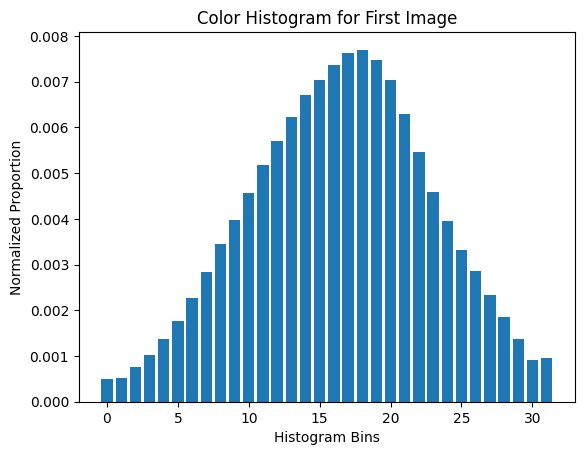

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Extract a row of color histogram data (e.g., the first row)
color_hist_values = combined_features_balanced.iloc[0, -32:].values  # Assuming last 32 columns are color hist bins

# Plot the histogram
plt.bar(range(len(color_hist_values)), color_hist_values)
plt.xlabel('Histogram Bins')
plt.ylabel('Normalized Proportion')
plt.title('Color Histogram for First Image')
plt.show()

#Dimentionality reduction PCA for Combined Features (1000 Images)

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load combined features
data = pd.read_csv("/content/combined_features_balanced.csv")

# Exclude the 'image_name' , 'disease_name' column and standardize features
feature_data = data.drop(columns=['image_name', 'disease_name'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_data)

# Apply PCA
pca = PCA(n_components=50)  # Keep 50 principal components (adjust as needed)
pca_features = pca.fit_transform(scaled_features)

# Save PCA-transformed features
pca_features_df = pd.DataFrame(pca_features, columns=[f'pca_{i}' for i in range(pca.n_components_)])
pca_features_df['image_name'] = data['image_name']
pca_features_df.to_csv("pca_features_balanced.csv", index=False)
print("PCA features saved to 'pca_features_balanced.csv'")

PCA features saved to 'pca_features_balanced.csv'


In [8]:
files.download("/content/pca_features_balanced.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# Load the PCA-transformed file
pca_file_path = "/content/pca_features_balanced.csv"
pca_data_balanced = pd.read_csv(pca_file_path)

# Display the first few rows
print(pca_data_balanced.head())

# Check the shape of the data (rows and columns)
print(f"Number of rows: {pca_data_balanced.shape[0]}, Number of columns: {pca_data_balanced.shape[1]}")

       pca_0      pca_1      pca_2     pca_3     pca_4     pca_5      pca_6  \
0   6.636038  -1.939227  -2.589426  2.945924  9.792974  3.655708 -16.973333   
1 -11.481721  18.198345  -5.854293  7.034841 -7.133950  4.684411   3.598283   
2 -36.713130   6.996273   2.140495 -6.881432  1.464674  5.632400  22.395342   
3 -24.858595 -13.431568 -11.642291  8.095534 -2.052408  4.586179   1.999897   
4  -0.660040  -2.407617  -7.171126  5.091089 -7.052279  7.704073  13.559932   

      pca_7      pca_8      pca_9  ...     pca_41     pca_42    pca_43  \
0  8.463349  10.902321  -1.148773  ...   0.048576  -2.692261  4.208682   
1  8.720727  -3.665967  11.824473  ...   8.576548  -1.505602  4.685429   
2  0.407400  20.928570  -6.404638  ...  -4.251344  15.982104  3.409065   
3 -2.764580  -3.533155  -1.485335  ... -12.533235  -4.934034 -4.522619   
4  1.877695   3.012491  -6.949096  ...  -4.437511   5.975105 -7.991956   

     pca_44    pca_45    pca_46    pca_47    pca_48    pca_49      image_name  


In [1]:
import pandas as pd
# upload the file pca_features which includes 51 features of around 5000. This file is based on the 1000 images from the combined_features_limited file
# that has both Dinov2 and HOG and color histogram applied to the images.
pca_file_path = "/content/drive/MyDrive/w281_Final_Project_Leaf_Disease_Classification_Computer_Vision/Data/pca_features_balanced.csv"
pca_data_balanced = pd.read_csv(pca_file_path)


### Add labels to the data for Classification

In [11]:
import json

#path = "/content/drive/MyDrive/w281_Final_Project_Leaf_Disease_Classification_Computer_Vision/Data/train_images"

json_file_path = '/content/drive/MyDrive/w281_Final_Project_Leaf_Disease_Classification_Computer_Vision/Data/label_num_to_disease_map.json'
with open(json_file_path, 'r') as json_file:
    label_map = json.load(json_file)

csv_file_path = '/content/drive/MyDrive/w281_Final_Project_Leaf_Disease_Classification_Computer_Vision/Data/train.csv'
df = pd.read_csv(csv_file_path)


df.head()


,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [12]:
# Merge the two DataFrames on the image identifier columns
merged_data = pd.merge(
    pca_data_balanced,
    df.rename(columns={'image_id': 'image_name'}),  # Align column names for merging
    on="image_name",
    how="inner"  # Keep only rows present in both DataFrames
)

# Save the merged DataFrame
merged_data.to_csv("pca_data_with_labels.csv", index=False)
print("Merged data saved to 'pca_data_with_labels.csv'")

Merged data saved to 'pca_data_with_labels.csv'


In [13]:
files.download("/content/pca_data_with_labels.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
pca_file_path = "/content/pca_data_with_labels.csv"
pca_data_with_labels = pd.read_csv(pca_file_path)
pca_data_with_labels

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_42,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49,image_name,label
0,6.636038,-1.939227,-2.589426,2.945924,9.792974,3.655708,-16.973333,8.463349,10.902321,-1.148773,...,-2.692261,4.208682,-2.174076,-5.411625,6.498442,4.745767,-1.659164,-1.332601,719825434.jpg,3
1,-11.481721,18.198345,-5.854293,7.034841,-7.133950,4.684411,3.598283,8.720727,-3.665967,11.824473,...,-1.505602,4.685429,-3.469177,4.727840,-1.557634,0.214957,3.938904,-3.061316,587692768.jpg,1
2,-36.713130,6.996273,2.140495,-6.881432,1.464674,5.632400,22.395342,0.407400,20.928570,-6.404638,...,15.982104,3.409065,-1.522032,-6.893707,0.908241,-0.878703,3.073291,-9.856541,3660846961.jpg,4
3,-24.858595,-13.431568,-11.642291,8.095534,-2.052408,4.586179,1.999897,-2.764580,-3.533155,-1.485335,...,-4.934034,-4.522619,-0.409373,0.019869,0.071544,-2.278584,-3.138464,3.100551,3701789990.jpg,3
4,-0.660040,-2.407617,-7.171126,5.091089,-7.052279,7.704073,13.559932,1.877695,3.012491,-6.949096,...,5.975105,-7.991956,0.977824,-1.301783,-2.054494,0.135642,6.262905,1.685520,2169168830.jpg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6.515476,8.959465,-5.877646,0.698728,-14.050391,-13.820268,1.272673,11.051024,12.391001,-1.448643,...,-0.801399,-4.772418,6.340815,2.586638,0.004762,-9.540332,-0.241982,0.190749,2614256143.jpg,1
996,-36.850739,-6.240824,12.916813,13.369416,-11.125601,8.207463,6.325986,-6.402955,0.004325,-0.463309,...,-4.355998,3.150117,-2.041449,-12.076515,-0.122605,1.542647,0.660048,-1.259763,1907138537.jpg,3
997,-32.370880,16.641668,-14.425981,-1.828775,2.403858,4.003236,-5.647310,-12.068968,-2.623539,0.511956,...,-5.906175,3.152885,2.755471,2.497923,1.706295,-0.850640,4.358664,2.153396,3412620463.jpg,4
998,6.159991,1.242910,-1.125804,12.227790,-3.980835,2.949495,8.944845,2.295699,-2.227581,0.486942,...,-1.045529,9.276471,3.330638,-3.361534,-2.907759,-3.567718,4.272232,2.428240,2024432255.jpg,3


In [4]:
#drop non feature columns for X
X = pca_data_with_labels.drop(columns=['image_name', 'label'])

# create the labels column y
y = pca_data_with_labels['label']

###Train the model

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_prob = clf.predict_proba(X_test)

# Print predicted probabilities for the first 5 samples
print("Predicted probabilities for the first 5 samples:")
print(y_pred_prob[:5])

# Get predicted class labels
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Predicted probabilities for the first 5 samples:
[[0.04 0.25 0.25 0.27 0.19]
 [0.11 0.21 0.09 0.32 0.27]
 [0.02 0.14 0.21 0.59 0.04]
 [0.   0.02 0.02 0.93 0.03]
 [0.07 0.08 0.18 0.63 0.04]]
Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.33      0.14      0.20        21
           2       0.67      0.09      0.16        22
           3       0.70      0.97      0.81       126
           4       0.54      0.32      0.40        22

    accuracy                           0.67       200
   macro avg       0.45      0.30      0.31       200
weighted avg       0.61      0.67      0.59       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


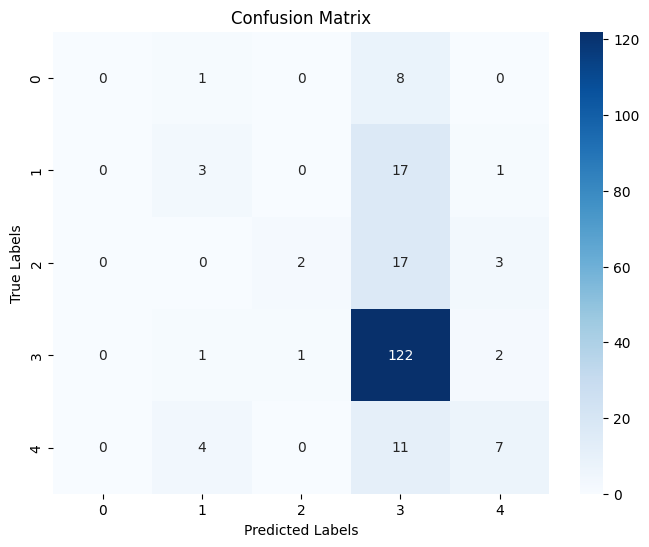

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

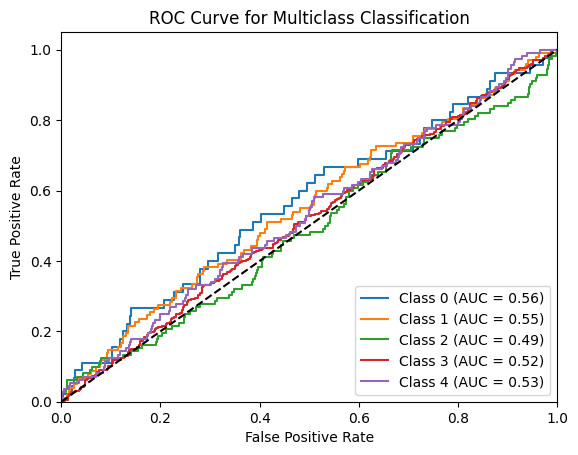

In [8]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Example data: replace with actual predictions and true labels
y_true = y
y_pred_prob = np.random.rand(len(y_true), 5)  # Replace with predicted probabilities

# Binarize the labels for one-vs-rest strategy
classes = [0, 1, 2, 3, 4]  # The class labels
y_true_binarized = label_binarize(y_true, classes=classes)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Classification")
plt.legend(loc="lower right")
plt.show()

###Evaluate the model

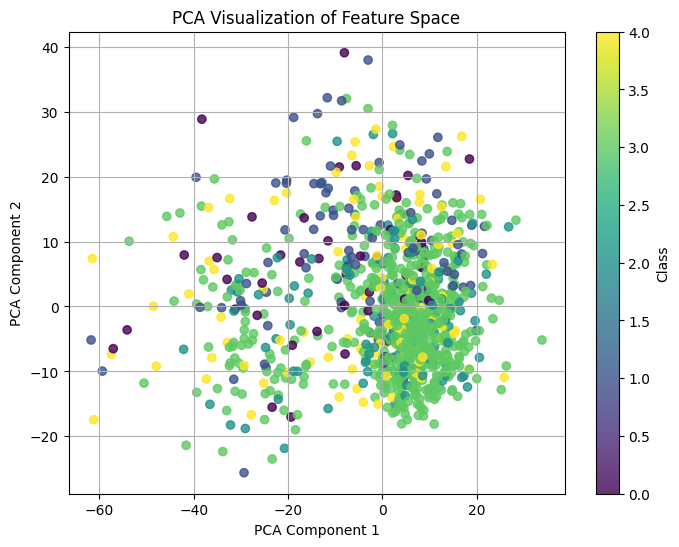

In [10]:
from sklearn.decomposition import PCA

# Load the dataset
# Ensure 'data' contains only the feature columns (exclude labels for PCA)
data = pd.read_csv("pca_data_with_labels.csv")  # Replace with your file
features = data.drop(columns=["image_name", "label"])  # Drop non-numeric columns

# Load the labels
labels = data["label"]

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for 2D visualization
reduced_features = pca.fit_transform(features)

# Plot the PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap="viridis", alpha=0.8)
plt.colorbar(scatter, label="Class")
plt.title("PCA Visualization of Feature Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


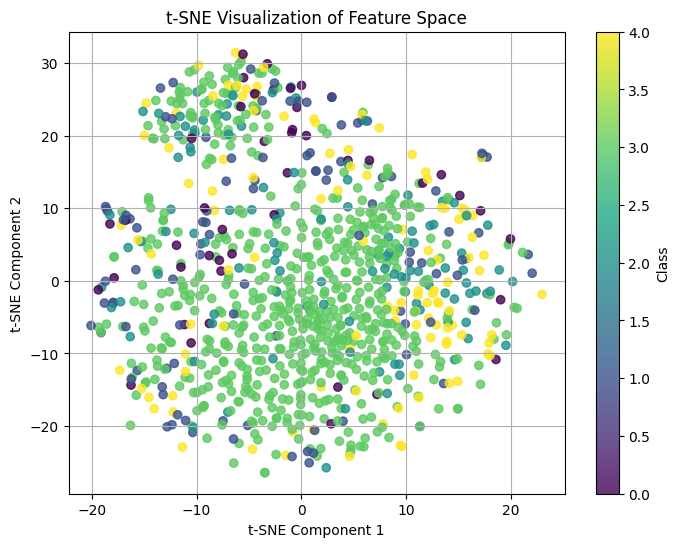

In [11]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)  # Adjust parameters as needed
tsne_results = tsne.fit_transform(features)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap="viridis", alpha=0.8)
plt.colorbar(scatter, label="Class")
plt.title("t-SNE Visualization of Feature Space")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()